In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import make_blobs

In [2]:
class_1 = 500
class_2 = 50
centers = [[0.0,0.0],[2.0,2.0]]
clusters_std = [1.5,0.5]
X,y = make_blobs(n_samples=[class_1,class_2]
                ,centers=centers
                ,cluster_std=clusters_std
                ,random_state=420
                ,shuffle=False)

In [3]:
X.shape

(550, 2)

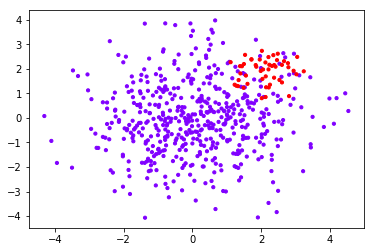

In [4]:
plt.scatter(X[:,0],X[:,1],c=y,cmap="rainbow",s=10)
plt.show()

In [5]:
clf = SVC(kernel="linear",C=1.0)
clf.fit(X,y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [6]:
wclf = SVC(kernel="linear",class_weight={1:10})
wclf.fit(X,y)

SVC(C=1.0, cache_size=200, class_weight={1: 10}, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [7]:
clf.score(X,y)

0.9127272727272727

In [8]:
wclf.score(X,y)

0.88

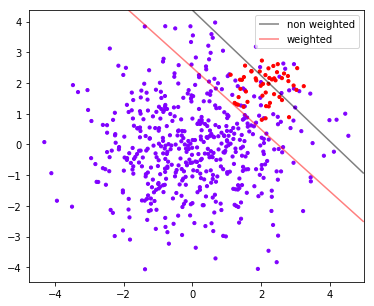

In [9]:
plt.figure(figsize=(6,5))
plt.scatter(X[:,0],X[:,1],c=y,cmap="rainbow",s=10)
ax = plt.gca()

xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx = np.linspace(xlim[0],xlim[1],30)
yy = np.linspace(ylim[0],ylim[1],30)

YY,XX = np.meshgrid(yy,xx)
xy = np.vstack([XX.ravel(),YY.ravel()]).T

Z_clf = clf.decision_function(xy).reshape(XX.shape)
a = ax.contour(XX,YY,Z_clf,colors='black',levels=[0],alpha=0.5,linestyles=['-'])
Z_wclf = wclf.decision_function(xy).reshape(XX.shape)
b = ax.contour(XX,YY,Z_wclf,colors='red',levels=[0],alpha=0.5,linestyles=['-'])

plt.legend([a.collections[0]  # 等高线对象中画的线
            ,b.collections[0]],["non weighted","weighted"],loc="upper right")
plt.show()

In [20]:
(y[y == clf.predict(X)]==1).sum()/(clf.predict(X)==1).sum()

0.6363636363636364

In [21]:
(y[y == wclf.predict(X)]==1).sum()/(wclf.predict(X)==1).sum()

0.5208333333333334

In [22]:
(y[y==clf.predict(X)]==1).sum()/(y==1).sum()

0.7

In [24]:
(y[y==wclf.predict(X)]==1).sum()/(y==1).sum()

1.0

In [25]:
(y[y == clf.predict(X)] == 0).sum()/(y==0).sum()

0.96

In [26]:
(y[y == wclf.predict(X)] == 0).sum()/(y==0).sum()

0.908

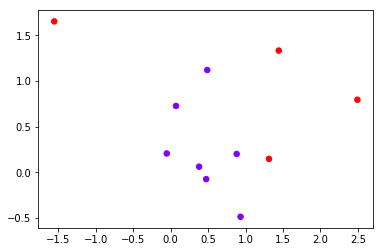

In [29]:
class_1_ = 7
class_2_ = 4
centers_ = [[0.0,0.0],[1,1]]
clusters_std = [0.5,1]
X_,y_ = make_blobs(n_samples=[class_1_,class_2_]
                   ,centers=centers_,cluster_std=clusters_std
                   ,random_state=0,shuffle=False)
plt.scatter(X_[:,0],X_[:,1],c=y_,cmap="rainbow",s=30)
plt.show()

In [32]:
from sklearn.linear_model import LogisticRegression as LogiR

In [33]:
clf_lo = LogiR().fit(X_,y_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [34]:
prob = clf_lo.predict_proba(X_)
prob.shape

(11, 2)

In [35]:
import pandas as pd

In [36]:
prob = pd.DataFrame(prob)

In [38]:
prob.columns = ["0","1"]

In [39]:
prob.head()

,0,1
0,0.604664,0.395336
1,0.458916,0.541084
2,0.717986,0.282014
3,0.679109,0.320891
4,0.664739,0.335261


In [40]:
for i in range(prob.shape[0]):
    if prob.loc[i,"1"] > 0.5:
        prob.loc[i,"pred"] = 1
    else:
        prob.loc[i,"pred"] = 0

In [43]:
prob

,0,1,pred
0,0.604664,0.395336,0.0
1,0.458916,0.541084,1.0
2,0.717986,0.282014,0.0
3,0.679109,0.320891,0.0
4,0.664739,0.335261,0.0
5,0.562775,0.437225,0.0
6,0.662054,0.337946,0.0
7,0.355167,0.644833,1.0
8,0.381606,0.618394,1.0
9,0.585284,0.414716,0.0


In [44]:
prob["y_true"] = y_

In [45]:
prob = prob.sort_values(by="1",ascending=False)

In [46]:
prob

,0,1,pred,y_true
7,0.355167,0.644833,1.0,1
8,0.381606,0.618394,1.0,1
1,0.458916,0.541084,1.0,0
10,0.501493,0.498507,0.0,1
5,0.562775,0.437225,0.0,0
9,0.585284,0.414716,0.0,1
0,0.604664,0.395336,0.0,0
6,0.662054,0.337946,0.0,0
4,0.664739,0.335261,0.0,0
3,0.679109,0.320891,0.0,0


In [47]:
from sklearn.metrics import confusion_matrix as CM,precision_score as P,recall_score as R

In [48]:
CM(prob.loc[:,"y_true"],prob.loc[:,"pred"],labels=[1,0])

array([[2, 2],
       [1, 6]], dtype=int64)

In [50]:
P(prob.loc[:,"y_true"],prob.loc[:,"pred"],labels=[1,0])

0.6666666666666666

In [51]:
R(prob.loc[:,"y_true"],prob.loc[:,"pred"],labels=[1,0])

0.5

In [52]:
for i in range(prob.shape[0]):
    if prob.loc[i,"1"] > 0.4:
        prob.loc[i,"pred"] = 1
    else:
        prob.loc[i,"pred"] = 0

In [53]:
prob

,0,1,pred,y_true
7,0.355167,0.644833,1.0,1
8,0.381606,0.618394,1.0,1
1,0.458916,0.541084,1.0,0
10,0.501493,0.498507,1.0,1
5,0.562775,0.437225,1.0,0
9,0.585284,0.414716,1.0,1
0,0.604664,0.395336,0.0,0
6,0.662054,0.337946,0.0,0
4,0.664739,0.335261,0.0,0
3,0.679109,0.320891,0.0,0


In [55]:
prob = prob.sort_values(by="1",ascending=False)
prob

,0,1,pred,y_true
7,0.355167,0.644833,1.0,1
8,0.381606,0.618394,1.0,1
1,0.458916,0.541084,1.0,0
10,0.501493,0.498507,1.0,1
5,0.562775,0.437225,1.0,0
9,0.585284,0.414716,1.0,1
0,0.604664,0.395336,0.0,0
6,0.662054,0.337946,0.0,0
4,0.664739,0.335261,0.0,0
3,0.679109,0.320891,0.0,0


In [56]:
CM(prob.loc[:,"y_true"],prob.loc[:,"pred"],labels=[1,0])

array([[4, 0],
       [2, 5]], dtype=int64)

In [57]:
P(prob.loc[:,"y_true"],prob.loc[:,"pred"],labels=[1,0])

0.6666666666666666

In [58]:
R(prob.loc[:,"y_true"],prob.loc[:,"pred"],labels=[1,0])

1.0

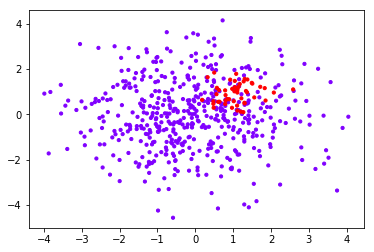

In [61]:
class_1 = 500
class_2 = 50
centers = [[0.0,0.0],[1.0,1.0]]
clusters_std = [1.5,0.5]
X,y = make_blobs(n_samples=[class_1,class_2],
                centers=centers,
                cluster_std=clusters_std,
                random_state=0,
                shuffle=False)
plt.scatter(X[:,0],X[:,1],c=y,cmap="rainbow",s=10)
plt.show()

In [65]:
from sklearn import svm
clf_proba = svm.SVC(kernel="linear",C=1.0,probability=True).fit(X,y)

In [66]:
clf_proba.predict_proba(X)

array([[0.89113389, 0.10886611],
       [0.95123066, 0.04876934],
       [0.82211157, 0.17788843],
       ...,
       [0.90729169, 0.09270831],
       [0.91599162, 0.08400838],
       [0.92513135, 0.07486865]])

In [67]:
clf_proba.predict_proba(X).shape

(550, 2)

In [76]:
# clf_proba.decision_function(X)

In [69]:
clf_proba.decision_function(X).shape

(550,)

In [72]:
cm = CM(prob.loc[:,"y_true"],prob.loc[:,"pred"],labels=[1,0])
cm

array([[4, 0],
       [2, 5]], dtype=int64)

In [73]:
# FPR
cm[1,0]/cm[1,:].sum()

0.2857142857142857

In [74]:
# Recall
cm[0,0]/cm[0,:].sum()

1.0

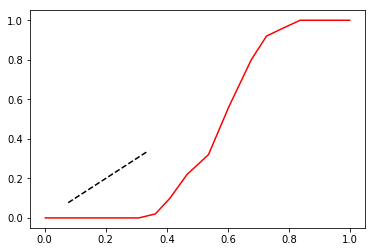

In [75]:
probrange = np.linspace(clf_proba.predict_proba(X)[:,1].min()
                       ,clf_proba.predict_proba(X)[:,1].max()
                       ,num=50,endpoint=False)
from sklearn.metrics import confusion_matrix as CM,recall_score as R
import matplotlib.pyplot as plot

recall = []
FPR = []

for i in probrange:
    y_predict = []
    for j in range(X.shape[0]):
        if clf_proba.predict_proba(X)[j,1] > i:
            y_predict.append(1)
        else:
            y_predict.append(0)
    cm = CM(y,y_predict,labels=[1,0])
    recall.append(cm[0,0]/cm[0,:].sum())
    FPR.append(cm[1,0]/cm[1,:].sum())
    
recall.sort()
FPR.sort()

plt.plot(FPR,recall,c="red")
plt.plot(probrange+0.05,probrange+0.05,c="black",linestyle="--")

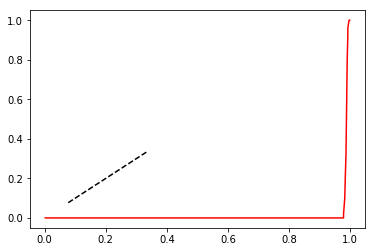

In [77]:
probrange = np.linspace(clf_proba.predict_proba(X)[:,1].min()
                       ,clf_proba.predict_proba(X)[:,1].max(),num=50,endpoint=False)
FPR = []
recall = []
for i in probrange:
    y_predict = []
    for j in range(X.shape[0]):
        if clf_proba.predict_proba(X)[j,1] > i:
            y_predict.append(1)
        else:
            y_predict.append(0)
    cm = CM(y,y_predict,labels=[1,0])
    recall.append(cm[0,0]/cm[0,:].sum())
    FPR.append(cm[1,1]/cm[1,:].sum())
recall.sort()
FPR.sort()

plt.plot(FPR,recall,c="red")
plt.plot(probrange+0.05,probrange+0.05,c="black",linestyle="--")
plt.show()

In [78]:
from sklearn.metrics import roc_curve

In [79]:
FPR,recall,threshold = roc_curve(y,clf_proba.decision_function(X),pos_label=1)

In [80]:
FPR

array([0.   , 0.002, 0.34 , 0.34 , 0.362, 0.362, 0.376, 0.376, 0.388,
       0.388, 0.41 , 0.41 , 0.426, 0.426, 0.432, 0.432, 0.438, 0.438,
       0.44 , 0.44 , 0.462, 0.462, 0.498, 0.498, 0.5  , 0.5  , 0.502,
       0.502, 0.53 , 0.53 , 0.538, 0.538, 0.542, 0.542, 0.546, 0.546,
       0.552, 0.552, 0.554, 0.554, 0.562, 0.562, 0.57 , 0.57 , 0.576,
       0.576, 0.582, 0.582, 0.594, 0.594, 0.612, 0.612, 0.624, 0.624,
       0.636, 0.636, 0.64 , 0.64 , 0.642, 0.642, 0.648, 0.648, 0.652,
       0.652, 0.654, 0.654, 0.676, 0.676, 0.682, 0.682, 0.684, 0.684,
       0.69 , 0.69 , 0.704, 0.704, 0.708, 0.708, 0.716, 0.716, 0.732,
       0.732, 0.762, 0.762, 0.804, 0.804, 0.816, 0.816, 1.   ])

In [81]:
recall

array([0.  , 0.  , 0.  , 0.02, 0.02, 0.04, 0.04, 0.06, 0.06, 0.08, 0.08,
       0.1 , 0.1 , 0.14, 0.14, 0.16, 0.16, 0.18, 0.18, 0.2 , 0.2 , 0.22,
       0.22, 0.24, 0.24, 0.28, 0.28, 0.3 , 0.3 , 0.32, 0.32, 0.36, 0.36,
       0.38, 0.38, 0.42, 0.42, 0.44, 0.44, 0.46, 0.46, 0.48, 0.48, 0.5 ,
       0.5 , 0.52, 0.52, 0.54, 0.54, 0.56, 0.56, 0.6 , 0.6 , 0.62, 0.62,
       0.64, 0.64, 0.66, 0.66, 0.68, 0.68, 0.74, 0.74, 0.76, 0.76, 0.78,
       0.78, 0.8 , 0.8 , 0.82, 0.82, 0.84, 0.84, 0.86, 0.86, 0.88, 0.88,
       0.9 , 0.9 , 0.92, 0.92, 0.94, 0.94, 0.96, 0.96, 0.98, 0.98, 1.  ,
       1.  ])

In [82]:
threshold

array([ 3.89887940e-04, -9.99610112e-01, -9.99990364e-01, -9.99990497e-01,
       -9.99994378e-01, -9.99995180e-01, -1.00000266e+00, -1.00000291e+00,
       -1.00000489e+00, -1.00000520e+00, -1.00001185e+00, -1.00001187e+00,
       -1.00001802e+00, -1.00001932e+00, -1.00002030e+00, -1.00002045e+00,
       -1.00002153e+00, -1.00002194e+00, -1.00002321e+00, -1.00002323e+00,
       -1.00002873e+00, -1.00002897e+00, -1.00003948e+00, -1.00003951e+00,
       -1.00003955e+00, -1.00004017e+00, -1.00004069e+00, -1.00004073e+00,
       -1.00004857e+00, -1.00004916e+00, -1.00005042e+00, -1.00005169e+00,
       -1.00005392e+00, -1.00005405e+00, -1.00005431e+00, -1.00005444e+00,
       -1.00005507e+00, -1.00005523e+00, -1.00005524e+00, -1.00005545e+00,
       -1.00005858e+00, -1.00005890e+00, -1.00006091e+00, -1.00006103e+00,
       -1.00006270e+00, -1.00006295e+00, -1.00006530e+00, -1.00006548e+00,
       -1.00006867e+00, -1.00007016e+00, -1.00007242e+00, -1.00007299e+00,
       -1.00007550e+00, -

In [83]:
from sklearn.metrics import roc_auc_score as AUC

In [84]:
area = AUC(y,clf_proba.decision_function(X))

In [85]:
area

0.42560000000000003

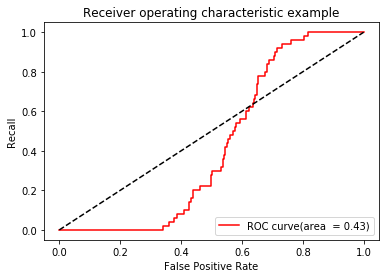

In [86]:
plt.figure()
plt.plot(FPR,recall,color="red",label="ROC curve(area  = %0.2f)"%area)
plt.plot([0,1],[0,1],color='black',linestyle='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('Recall')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [87]:
max((recall-FPR).tolist())

0.20799999999999996

In [89]:
maxindex = (recall-FPR).tolist().index(max(recall-FPR))
maxindex

81

In [90]:
threshold[maxindex]

-1.0001184913299797

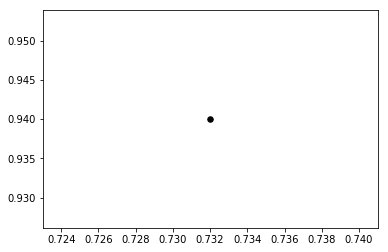

In [91]:
plt.scatter(FPR[maxindex],recall[maxindex],c="black",s=30)

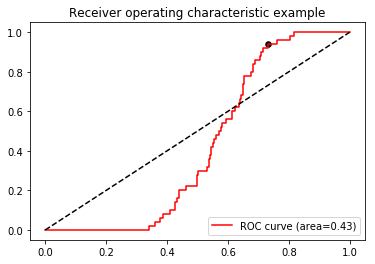

In [92]:
plt.figure()
plt.plot(FPR,recall,color="red",label="ROC curve (area=%0.2f)"%area)
plt.plot([0,1],[0,1],color='black',linestyle='--')
plt.scatter(FPR[maxindex],recall[maxindex],c='black',s=30)
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])
plt.title('Receiver operating characteristic example')
plt.legend(loc='lower right')
plt.show()

In [ ]:
from sklearn import svm
from sklearn.metrics import confusion_matrix as CM,precision_score as P,recall_score as R
CM(prob.loc[:,"y_true"],prob.loc[:,"pred"],labels=[1,0])
P(prob.loc[:,"y_true"],prob.loc[:,"pred"],labels=[1,0])
clf_proba = svm.SVC(kernel="linear",C=1.0,probability=True).fit(X,y)
clf_proba.predict_proba(X)
clf_proba.decision_function(X)
cm = CM(prob.loc[:,"y_true"],prob.loc[:,"pred"],labels=[1,0])

probrange = np.linspace(clf_proba.predict_proba(X).min(),
                       clf_proba.predict_proba(X).max(),
                       num=50,endpoint=False)
from sklearn.metrics import confusion_metrix as CM,recall_score as R,precission_score as P
recall = []
FPR = []

for i in probrange:
    y_predict = []
    for j in range(X.shape[0]):
        if clf_proba.predict_proba > i:
            y_predict.append(1)
        else:
            y_predict.append(0)
    cm = CM(y,y_predict,labels=[1,0])
    recall.append(cm[0,0]/cm[0,:].sum())
    FPR.append(cm[1,0]/cm[1,:].sum())
recall.sort()        
FPR.sort()
plt.plot(FPR,recall,c="red")
plt.plot(probarange+0.05,probarange+0.05,c="black",linestyle="--")
plt.show()

from sklearn.metrics import roc_curve
FPR,recall,threshold = roc_curve(y,clf_proba.decision_function(X),pos_label=1)
from sklearn.metrics import roc_auc_score as AUC
area = AUC(y,clf_proba.decision_function(X))

max((recall-FPR).tolist())
maxindex = (recall-FPR).tolist().index(max(recall-FPR))
plt.scatter(FPR[maxindex],recall[maxindex],c='black',s=30)


## 预测明天是否会下雨

In [137]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [138]:
weather = pd.read_csv(r"D:\titanic\weather.csv",index_col=0)

In [139]:
weather.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainTomorrow
0,2015-03-24,Adelaide,12.3,19.3,0.0,5.0,NaN,S,39.0,S,...,19.0,59.0,47.0,1022.2,1021.4,NaN,NaN,15.1,17.7,No
1,2011-07-12,Adelaide,7.9,11.4,0.0,1.0,0.5,N,20.0,NNE,...,7.0,70.0,59.0,1028.7,1025.7,NaN,NaN,8.4,11.3,No
2,2010-02-08,Adelaide,24.0,38.1,0.0,23.4,13.0,SE,39.0,NNE,...,19.0,36.0,24.0,1018.0,1016.0,NaN,NaN,32.4,37.4,No
3,2016-09-19,Adelaide,6.7,16.4,0.4,NaN,NaN,N,31.0,N,...,15.0,65.0,40.0,1014.4,1010.0,NaN,NaN,11.2,15.9,No
4,2014-03-05,Adelaide,16.7,24.8,0.0,6.6,11.7,S,37.0,S,...,24.0,61.0,48.0,1019.3,1018.9,NaN,NaN,20.8,23.7,No


In [140]:
weather.shape

(5000, 22)

In [141]:
y = weather.iloc[:,-1]
X = weather.iloc[:,:-1]

In [142]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 21 columns):
Date             5000 non-null object
Location         5000 non-null object
MinTemp          4979 non-null float64
MaxTemp          4987 non-null float64
Rainfall         4950 non-null float64
Evaporation      2841 non-null float64
Sunshine         2571 non-null float64
WindGustDir      4669 non-null object
WindGustSpeed    4669 non-null float64
WindDir9am       4651 non-null object
WindDir3pm       4887 non-null object
WindSpeed9am     4949 non-null float64
WindSpeed3pm     4919 non-null float64
Humidity9am      4936 non-null float64
Humidity3pm      4880 non-null float64
Pressure9am      4506 non-null float64
Pressure3pm      4504 non-null float64
Cloud9am         3111 non-null float64
Cloud3pm         3012 non-null float64
Temp9am          4967 non-null float64
Temp3pm          4912 non-null float64
dtypes: float64(16), object(5)
memory usage: 859.4+ KB


In [143]:
X.shape

(5000, 21)

In [144]:
X.isnull().mean()
# X.isnull().sum()/X.shape[0]

Date             0.0000
Location         0.0000
MinTemp          0.0042
MaxTemp          0.0026
Rainfall         0.0100
Evaporation      0.4318
Sunshine         0.4858
WindGustDir      0.0662
WindGustSpeed    0.0662
WindDir9am       0.0698
WindDir3pm       0.0226
WindSpeed9am     0.0102
WindSpeed3pm     0.0162
Humidity9am      0.0128
Humidity3pm      0.0240
Pressure9am      0.0988
Pressure3pm      0.0992
Cloud9am         0.3778
Cloud3pm         0.3976
Temp9am          0.0066
Temp3pm          0.0176
dtype: float64

In [145]:
y.isnull().sum()

0

In [146]:
np.unique(y)

array(['No', 'Yes'], dtype=object)

In [147]:
Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,y,test_size=0.3,random_state=420)

In [148]:
Xtrain.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
1809,2015-08-24,Katherine,17.5,36.0,0.0,8.8,NaN,ESE,26.0,NNW,...,17.0,15.0,57.0,NaN,1016.8,1012.2,0.0,NaN,27.5,NaN
4176,2016-12-10,Tuggeranong,9.5,25.0,0.0,NaN,NaN,NNW,33.0,NE,...,7.0,17.0,59.0,31.0,1020.4,1017.5,NaN,NaN,14.6,23.6
110,2010-04-18,Albany,13.0,22.6,0.0,3.8,10.4,NaN,NaN,NE,...,17.0,31.0,79.0,68.0,1020.3,1015.7,1.0,3.0,17.5,20.8
3582,2009-11-26,Sale,13.9,29.8,0.0,5.8,5.1,S,37.0,N,...,11.0,28.0,82.0,44.0,1012.5,1005.9,6.0,6.0,18.5,27.5
2162,2014-04-25,Mildura,6.0,23.5,0.0,2.8,8.6,NNE,24.0,E,...,15.0,15.0,58.0,35.0,1019.8,1014.1,2.0,4.0,12.4,22.4


In [149]:
for i in [Xtrain,Xtest,Ytrain,Ytest]:
    i.index = range(i.shape[0])

In [150]:
Xtrain.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,2015-08-24,Katherine,17.5,36.0,0.0,8.8,NaN,ESE,26.0,NNW,...,17.0,15.0,57.0,NaN,1016.8,1012.2,0.0,NaN,27.5,NaN
1,2016-12-10,Tuggeranong,9.5,25.0,0.0,NaN,NaN,NNW,33.0,NE,...,7.0,17.0,59.0,31.0,1020.4,1017.5,NaN,NaN,14.6,23.6
2,2010-04-18,Albany,13.0,22.6,0.0,3.8,10.4,NaN,NaN,NE,...,17.0,31.0,79.0,68.0,1020.3,1015.7,1.0,3.0,17.5,20.8
3,2009-11-26,Sale,13.9,29.8,0.0,5.8,5.1,S,37.0,N,...,11.0,28.0,82.0,44.0,1012.5,1005.9,6.0,6.0,18.5,27.5
4,2014-04-25,Mildura,6.0,23.5,0.0,2.8,8.6,NNE,24.0,E,...,15.0,15.0,58.0,35.0,1019.8,1014.1,2.0,4.0,12.4,22.4


In [151]:
Ytrain.head()

0     No
1     No
2     No
3    Yes
4     No
Name: RainTomorrow, dtype: object

In [152]:
Ytrain.value_counts()

No     2704
Yes     796
Name: RainTomorrow, dtype: int64

In [153]:
Ytest.value_counts()

No     1157
Yes     343
Name: RainTomorrow, dtype: int64

In [154]:
Ytrain.value_counts()[0]/Ytrain.value_counts()[1]

3.3969849246231156

In [155]:
Ytest.value_counts()[0]/Ytest.value_counts()[1]

3.373177842565598

In [156]:
from sklearn.preprocessing import LabelEncoder
encorder = LabelEncoder().fit(Ytrain)

In [157]:
Ytrain = pd.DataFrame(encorder.transform(Ytrain))
Ytest = pd.DataFrame(encorder.transform(Ytest))

In [158]:
Ytrain.head()

,0
0,0
1,0
2,0
3,1
4,0


In [159]:
Ytest.head()

,0
0,0
1,0
2,1
3,0
4,0


In [ ]:
Ytrain.to_csv()

In [160]:
Xtrain.describe([0.01,0.05,0.1,0.25,0.5,0.75,0.9,0.99]).T

,count,mean,std,min,1%,5%,10%,25%,50%,75%,90%,99%,max
MinTemp,3486.0,12.225645,6.396243,-6.5,-1.715,1.800,4.1,7.7,12.0,16.7,20.9,25.900,29.0
MaxTemp,3489.0,23.245543,7.201839,-3.7,8.888,12.840,14.5,18.0,22.5,28.4,33.0,40.400,46.4
Rainfall,3467.0,2.487049,7.949686,0.0,0.000,0.000,0.0,0.0,0.0,0.8,6.6,41.272,115.8
Evaporation,1983.0,5.619163,4.383098,0.0,0.400,0.800,1.4,2.6,4.8,7.4,10.2,20.600,56.0
Sunshine,1790.0,7.508659,3.805841,0.0,0.000,0.345,1.4,4.6,8.3,10.6,12.0,13.300,13.9
WindGustSpeed,3263.0,39.858413,13.219607,9.0,15.000,20.000,24.0,31.0,39.0,48.0,57.0,76.000,117.0
WindSpeed9am,3466.0,14.046163,8.670472,0.0,0.000,0.000,4.0,7.0,13.0,19.0,26.0,37.000,65.0
WindSpeed3pm,3437.0,18.553390,8.611818,0.0,2.000,6.000,7.0,13.0,19.0,24.0,30.0,43.000,65.0
Humidity9am,3459.0,69.069095,18.787698,2.0,18.000,35.000,45.0,57.0,70.0,83.0,94.0,100.000,100.0
Humidity3pm,3408.0,51.651995,20.697872,2.0,9.000,17.000,23.0,37.0,52.0,66.0,79.0,98.000,100.0


In [161]:
Xtest.describe([0.01,0.05,0.1,0.25,0.5,0.75,0.9,0.99]).T

,count,mean,std,min,1%,5%,10%,25%,50%,75%,90%,99%,max
MinTemp,1493.0,11.916812,6.375377,-8.5,-2.024,1.600,3.70,7.3,11.8,16.5,20.48,25.316,28.3
MaxTemp,1498.0,22.906809,6.986043,-0.8,9.134,13.000,14.50,17.8,22.4,27.8,32.60,38.303,45.1
Rainfall,1483.0,2.241807,7.988822,0.0,0.000,0.000,0.00,0.0,0.0,0.8,5.20,35.372,108.2
Evaporation,858.0,5.657809,4.105762,0.0,0.400,1.000,1.60,2.8,4.8,7.6,10.40,19.458,38.8
Sunshine,781.0,7.677465,3.862294,0.0,0.000,0.300,1.50,4.7,8.6,10.7,12.20,13.400,13.9
WindGustSpeed,1406.0,40.044097,14.027052,9.0,15.000,20.000,24.00,30.0,39.0,48.0,57.00,78.000,122.0
WindSpeed9am,1483.0,13.986514,9.124337,0.0,0.000,0.000,4.00,7.0,13.0,20.0,26.00,39.360,72.0
WindSpeed3pm,1482.0,18.601215,8.850446,0.0,2.000,6.000,7.00,13.0,19.0,24.0,31.00,43.000,56.0
Humidity9am,1477.0,68.688558,18.876448,4.0,20.000,36.000,44.00,57.0,69.0,82.0,95.00,100.000,100.0
Humidity3pm,1472.0,51.431386,20.459957,2.0,8.710,18.000,23.00,37.0,52.0,66.0,78.00,96.290,100.0


In [162]:
Xtrainc = Xtrain.copy()

In [163]:
Xtrainc.sort_values(by="Location")

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
2796,2015-03-24,Adelaide,12.3,19.3,0.0,5.0,NaN,S,39.0,S,...,13.0,19.0,59.0,47.0,1022.2,1021.4,NaN,NaN,15.1,17.7
2975,2012-08-17,Adelaide,7.8,13.2,17.6,0.8,NaN,SW,61.0,SW,...,20.0,28.0,76.0,47.0,1012.5,1014.7,NaN,NaN,8.3,12.5
775,2013-03-16,Adelaide,17.4,23.8,NaN,NaN,9.7,SSE,46.0,S,...,9.0,19.0,63.0,57.0,1019.9,1020.5,NaN,NaN,19.1,20.7
861,2011-07-12,Adelaide,7.9,11.4,0.0,1.0,0.5,N,20.0,NNE,...,7.0,7.0,70.0,59.0,1028.7,1025.7,NaN,NaN,8.4,11.3
2906,2015-08-24,Adelaide,9.2,14.3,0.0,NaN,NaN,SE,48.0,SE,...,17.0,19.0,64.0,42.0,1024.7,1024.1,NaN,NaN,9.9,13.4
2900,2009-09-17,Adelaide,14.2,17.4,8.8,2.0,7.1,SW,41.0,SSW,...,15.0,20.0,82.0,56.0,1014.9,1018.0,NaN,NaN,16.2,16.7
902,2008-12-10,Adelaide,14.2,28.0,0.0,6.4,12.5,SE,48.0,E,...,13.0,13.0,56.0,35.0,1010.8,1008.9,NaN,NaN,19.3,25.6
919,2011-10-12,Adelaide,7.7,19.9,0.0,3.4,11.4,W,30.0,E,...,13.0,15.0,56.0,43.0,1021.2,1018.1,NaN,NaN,14.1,19.4
936,2014-03-11,Adelaide,22.3,32.2,0.4,20.6,3.2,W,65.0,ESE,...,9.0,9.0,53.0,78.0,1017.0,1017.2,NaN,NaN,25.6,22.8
942,2015-02-23,Adelaide,20.6,26.5,0.0,16.2,NaN,SSE,48.0,S,...,20.0,22.0,61.0,43.0,1015.3,1016.5,NaN,NaN,22.2,25.7


In [164]:
Xtrain.iloc[:,0].value_counts().count()

2141

In [165]:
Xtrain.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,2015-08-24,Katherine,17.5,36.0,0.0,8.8,NaN,ESE,26.0,NNW,...,17.0,15.0,57.0,NaN,1016.8,1012.2,0.0,NaN,27.5,NaN
1,2016-12-10,Tuggeranong,9.5,25.0,0.0,NaN,NaN,NNW,33.0,NE,...,7.0,17.0,59.0,31.0,1020.4,1017.5,NaN,NaN,14.6,23.6
2,2010-04-18,Albany,13.0,22.6,0.0,3.8,10.4,NaN,NaN,NE,...,17.0,31.0,79.0,68.0,1020.3,1015.7,1.0,3.0,17.5,20.8
3,2009-11-26,Sale,13.9,29.8,0.0,5.8,5.1,S,37.0,N,...,11.0,28.0,82.0,44.0,1012.5,1005.9,6.0,6.0,18.5,27.5
4,2014-04-25,Mildura,6.0,23.5,0.0,2.8,8.6,NNE,24.0,E,...,15.0,15.0,58.0,35.0,1019.8,1014.1,2.0,4.0,12.4,22.4


In [166]:
Xtrain["Rainfall"].head(20)

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
5      0.0
6      0.0
7      0.2
8      0.0
9      0.2
10     1.0
11     0.0
12     0.2
13     0.0
14     0.0
15     3.0
16     0.2
17     0.0
18    35.2
19     0.0
Name: Rainfall, dtype: float64

In [167]:
Xtrain["Rainfall"].isnull().sum()

33

In [168]:
Xtrain.loc[Xtrain["Rainfall"]>=1,"RainToday"] = "Yes"
Xtrain.loc[Xtrain["Rainfall"]<1,"RainToday"] = "No"
Xtrain.loc[Xtrain["Rainfall"]==np.nan,"RainToday"] = np.nan

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [169]:
Xtrain.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,2015-08-24,Katherine,17.5,36.0,0.0,8.8,NaN,ESE,26.0,NNW,...,15.0,57.0,NaN,1016.8,1012.2,0.0,NaN,27.5,NaN,No
1,2016-12-10,Tuggeranong,9.5,25.0,0.0,NaN,NaN,NNW,33.0,NE,...,17.0,59.0,31.0,1020.4,1017.5,NaN,NaN,14.6,23.6,No
2,2010-04-18,Albany,13.0,22.6,0.0,3.8,10.4,NaN,NaN,NE,...,31.0,79.0,68.0,1020.3,1015.7,1.0,3.0,17.5,20.8,No
3,2009-11-26,Sale,13.9,29.8,0.0,5.8,5.1,S,37.0,N,...,28.0,82.0,44.0,1012.5,1005.9,6.0,6.0,18.5,27.5,No
4,2014-04-25,Mildura,6.0,23.5,0.0,2.8,8.6,NNE,24.0,E,...,15.0,58.0,35.0,1019.8,1014.1,2.0,4.0,12.4,22.4,No


In [170]:
Xtest.loc[Xtest["Rainfall"]>=1,"RainToday"] = "Yes"
Xtest.loc[Xtest["Rainfall"]<1,"RainToday"]  = "No"
Xtest.loc[Xtest["Rainfall"] == np.nan,"RainToday"] = np.nan

In [171]:
Xtest.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,2016-01-23,NorahHead,22.0,27.8,25.2,NaN,NaN,SSW,57.0,S,...,37.0,91.0,86.0,1006.6,1008.1,NaN,NaN,26.2,23.1,Yes
1,2009-03-05,MountGambier,12.0,18.6,2.2,3.0,7.8,SW,52.0,SW,...,28.0,88.0,62.0,1020.2,1019.9,8.0,7.0,14.8,17.5,Yes
2,2010-03-05,MountGinini,9.1,13.3,NaN,NaN,NaN,NE,41.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2013-10-26,Wollongong,13.1,20.3,0.0,NaN,NaN,SW,33.0,W,...,24.0,40.0,51.0,1021.3,1019.5,NaN,NaN,16.8,19.6,No
4,2016-11-28,Sale,12.2,20.0,0.4,NaN,NaN,E,33.0,SW,...,19.0,92.0,69.0,1015.6,1013.2,8.0,4.0,13.6,19.0,No


In [172]:
Xtrain["Date"] = Xtrain["Date"].apply(lambda x:int(x.split("-")[1]))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [173]:
Xtrain.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,8,Katherine,17.5,36.0,0.0,8.8,NaN,ESE,26.0,NNW,...,15.0,57.0,NaN,1016.8,1012.2,0.0,NaN,27.5,NaN,No
1,12,Tuggeranong,9.5,25.0,0.0,NaN,NaN,NNW,33.0,NE,...,17.0,59.0,31.0,1020.4,1017.5,NaN,NaN,14.6,23.6,No
2,4,Albany,13.0,22.6,0.0,3.8,10.4,NaN,NaN,NE,...,31.0,79.0,68.0,1020.3,1015.7,1.0,3.0,17.5,20.8,No
3,11,Sale,13.9,29.8,0.0,5.8,5.1,S,37.0,N,...,28.0,82.0,44.0,1012.5,1005.9,6.0,6.0,18.5,27.5,No
4,4,Mildura,6.0,23.5,0.0,2.8,8.6,NNE,24.0,E,...,15.0,58.0,35.0,1019.8,1014.1,2.0,4.0,12.4,22.4,No


In [174]:
Xtrain.loc[:,"Date"].value_counts()

3     334
5     324
7     316
9     302
6     302
1     300
11    299
10    282
4     265
2     264
12    259
8     253
Name: Date, dtype: int64

In [175]:
Xtrain = Xtrain.rename(columns={"Date":"Month"})

In [176]:
Xtrain.head()

,Month,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,8,Katherine,17.5,36.0,0.0,8.8,NaN,ESE,26.0,NNW,...,15.0,57.0,NaN,1016.8,1012.2,0.0,NaN,27.5,NaN,No
1,12,Tuggeranong,9.5,25.0,0.0,NaN,NaN,NNW,33.0,NE,...,17.0,59.0,31.0,1020.4,1017.5,NaN,NaN,14.6,23.6,No
2,4,Albany,13.0,22.6,0.0,3.8,10.4,NaN,NaN,NE,...,31.0,79.0,68.0,1020.3,1015.7,1.0,3.0,17.5,20.8,No
3,11,Sale,13.9,29.8,0.0,5.8,5.1,S,37.0,N,...,28.0,82.0,44.0,1012.5,1005.9,6.0,6.0,18.5,27.5,No
4,4,Mildura,6.0,23.5,0.0,2.8,8.6,NNE,24.0,E,...,15.0,58.0,35.0,1019.8,1014.1,2.0,4.0,12.4,22.4,No


In [177]:
Xtest["Date"] = Xtest["Date"].apply(lambda x:int(x.split("-")[1]))
Xtest = Xtest.rename(columns={"Date":"Month"})

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [178]:
Xtest.head()

,Month,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,1,NorahHead,22.0,27.8,25.2,NaN,NaN,SSW,57.0,S,...,37.0,91.0,86.0,1006.6,1008.1,NaN,NaN,26.2,23.1,Yes
1,3,MountGambier,12.0,18.6,2.2,3.0,7.8,SW,52.0,SW,...,28.0,88.0,62.0,1020.2,1019.9,8.0,7.0,14.8,17.5,Yes
2,3,MountGinini,9.1,13.3,NaN,NaN,NaN,NE,41.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10,Wollongong,13.1,20.3,0.0,NaN,NaN,SW,33.0,W,...,24.0,40.0,51.0,1021.3,1019.5,NaN,NaN,16.8,19.6,No
4,11,Sale,12.2,20.0,0.4,NaN,NaN,E,33.0,SW,...,19.0,92.0,69.0,1015.6,1013.2,8.0,4.0,13.6,19.0,No


In [179]:
Xtrain.loc[:,"Location"].value_counts().count()

49

In [180]:
cityll = pd.read_csv(r"D:\titanic\cityll.csv",index_col=0)

In [181]:
city_climate = pd.read_csv(r"D:\titanic\cityclimate.csv")

In [182]:
cityll.head()

,City,Latitude,Longitude,Latitudedir,Longitudedir
0,Adelaide,34.9285°,138.6007°,"S,",E
1,Albany,35.0275°,117.8840°,"S,",E
2,Albury,36.0737°,146.9135°,"S,",E
3,Wodonga,36.1241°,146.8818°,"S,",E
4,AliceSprings,23.6980°,133.8807°,"S,",E


In [183]:
city_climate.head()

,City,Climate
0,Adelaide,Warm temperate
1,Albany,Mild temperate
2,Albury,"Hot dry summer, cool winter"
3,Wodonga,"Hot dry summer, cool winter"
4,AliceSprings,"Hot dry summer, warm winter"


In [184]:
float(cityll.loc[0,"Latitude"][:-1])

34.9285

In [185]:
cityll.loc[:,"Latitudedir"].value_counts()

S,    100
Name: Latitudedir, dtype: int64

In [186]:
cityll["Latitudenum"] = cityll["Latitude"].apply(lambda x:float(x[:-1]))
cityll["Longitudenum"] = cityll["Longitude"].apply(lambda x:float(x[:-1]))

In [187]:
cityll.head()

,City,Latitude,Longitude,Latitudedir,Longitudedir,Latitudenum,Longitudenum
0,Adelaide,34.9285°,138.6007°,"S,",E,34.9285,138.6007
1,Albany,35.0275°,117.8840°,"S,",E,35.0275,117.8840
2,Albury,36.0737°,146.9135°,"S,",E,36.0737,146.9135
3,Wodonga,36.1241°,146.8818°,"S,",E,36.1241,146.8818
4,AliceSprings,23.6980°,133.8807°,"S,",E,23.6980,133.8807


In [188]:
citylld = cityll.iloc[:,[0,5,6]]

In [189]:
citylld.head()

,City,Latitudenum,Longitudenum
0,Adelaide,34.9285,138.6007
1,Albany,35.0275,117.8840
2,Albury,36.0737,146.9135
3,Wodonga,36.1241,146.8818
4,AliceSprings,23.6980,133.8807


In [190]:
citylld["climate"] = city_climate.iloc[:,-1]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [191]:
citylld.head()

,City,Latitudenum,Longitudenum,climate
0,Adelaide,34.9285,138.6007,Warm temperate
1,Albany,35.0275,117.8840,Mild temperate
2,Albury,36.0737,146.9135,"Hot dry summer, cool winter"
3,Wodonga,36.1241,146.8818,"Hot dry summer, cool winter"
4,AliceSprings,23.6980,133.8807,"Hot dry summer, warm winter"


In [192]:
citylld.loc[:,"climate"].value_counts()

Hot dry summer, cool winter          24
Hot dry summer, warm winter          18
Warm temperate                       18
High humidity summer, warm winter    17
Cool temperate                        9
Mild temperate                        9
Warm humid summer, mild winter        5
Name: climate, dtype: int64